<a href="https://colab.research.google.com/github/chimaek/kaggle/blob/master/House_Sales_in_King_County%2C_USA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 집 값 예측하기 (House Sales in King County, USA)

**mikkang 팀**
* 김승주

* 강용재

* 허지식

* 박다은

## 라이브러리 , 데이터 추가

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"chimaek","key":"309f875c059cb8a4f4a380cee24f1941"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json


In [0]:
import pandas as pd  
# 데이터 처리를 위한 라이브러리

import numpy as np  
# 행렬 연산을 위한 라이브러리

from matplotlib import pyplot as plt 
# 데이터 시각화를 위한 라이브러리

import seaborn as sns  
# 데이터 시각화를 위한 라이브러리

%matplotlib inline 
# 주피터 노트북에서는 이 명령어를 넣어주어야 시각화차트를 보여줄 수 있음

from scipy.stats import pearsonr 
# 미적분 , 최적화 등 다양한 과학 기술 계산을 위한 패키지입니다.

!kaggle datasets download -d harlfoxem/housesalesprediction 
# 캐글 데이터 가져오기

import warnings
warnings.filterwarnings('ignore')
# 비추천 경고를 무시하는 라이브러리 

  0% 0.00/778k [00:00<?, ?B/s]
100% 778k/778k [00:00<00:00, 52.6MB/s]


In [0]:
train = pd.read_csv('/content/housesalesprediction.zip')
# 데이터 추가

## 데이터 분석

### 데이터 확인

In [0]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**각 피쳐 설명 ** 
  
   
** ID = 각 주택의 ID **  
** date = 집이 매진된 날짜 **  
** price = 집 값 (타겟) 예측해야될 목표 **  
** bedrooms = 집에 존재하는 침실의 갯수 **  
** bathrooms = 집에 존재하는 욕실의 갯수 **  
** sqft_living = 집 평방 피트 수 **  
** sqft_lot = 집  토지 평방 미터 **  
** floors = 집 층수 **  
** waterfront = 해안 존재 유(1) 무(0) **  
** view = 주택을 보았는지의 여부 유(1) 무(0) **  
** condition = 집의 전반적인 상태 1~5까지 표현 **  
** grade = 킹 카운티 시스템에 따라 1에서 1부터 11까지 표현 **  
** sqft_above = 지하실을 제외한 집의 평방 피트 **  
**  sqft_basement  = 지하실의 평방 피트 **  
** yr_bulit = 집을 지은 날 **  
** yr_renovated = 집을 리모델링 한 날 **  
** zipcode = 우편 번호 **  
** lat = 집의 위도 **  
** long = 집의 경도 **  
** sqft_living15 = 2015년도 거실 공간 **   
** sqft_lot15 = 2015년 토지 **


In [0]:
train.shape

# 행과 열이 얼마나 존재하는지

(21613, 21)

In [0]:
train.info()

#데이터 타입 형태 분석

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [0]:
train.describe()
# 데이터의 평균 중간값 등 분석

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [0]:
train.isnull().sum()

# 널값을 분석합니다. 이 데이터에서는 감사하게도 비어있는값이 없네요!

# 비어있는 값이 없다면 각 피쳐와 타겟의 상관관계를 볼 수 있어 데이터를 가공에 도움을 줄 수 있습니다.

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Features(각 열의 이름) 와 target(우리가 찾고자하는 price)의 상관 관계 

In [0]:
features = train.iloc[:,3:].columns.tolist()
# id , data ,price 피쳐는 데이터 가공에 불필요함으로 피쳐와 타겟의 상관관계를 분석하기위해 변수를 만들어준다.
target = train.iloc[:,2].name
# target(price)의 이름를 가져온다.

In [0]:
# 데이터 프레임을 생성하기 위한 반복문 생성
correlations = {}
#데이터 상관관계를 분석하기위해 dict을 만들어준다.
for f in features:
    train_temp = train[[f,target]]
    a = train_temp[f].values
    b = train_temp[target].values
    key = f + ' vs ' + target
    correlations[key] = pearsonr(a,b)[0]
    # pearsonr 함수는 scipy에서 지원한다. 각 피쳐와 타겟의 피어슨 상관계수를 통해 -1 ~ 1 사이의 값을 리턴
    # 만약 관계가 없다면 0


In [0]:
train_correlations = pd.DataFrame(correlations, index=['Value']).T
# 앞서 만든 딕셔너리를 통해 새로운 데이터 프레임을 만들되 열의 이름을 'value로'주고 T 를 통해 행과 열을 치환시킨다.

train_correlations.loc[train_correlations['Value'].abs().sort_values(ascending=False).index]
# target에 상관계수가 높은 순으로 정렬한다.


,Value
sqft_living vs price,0.702035
grade vs price,0.667434
sqft_above vs price,0.605567
sqft_living15 vs price,0.585379
bathrooms vs price,0.525138
view vs price,0.397293
sqft_basement vs price,0.323816
bedrooms vs price,0.308350
lat vs price,0.307003
waterfront vs price,0.266369


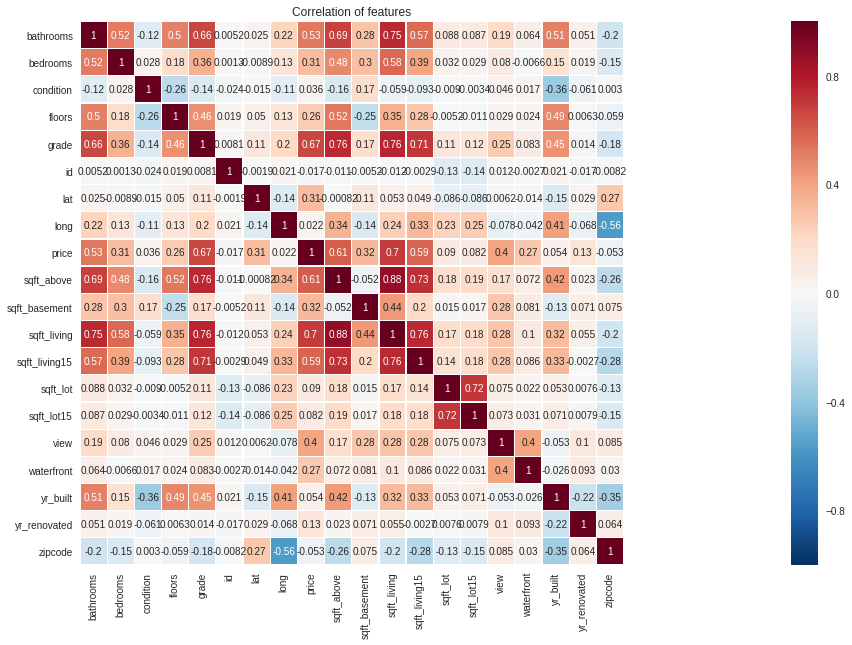

In [0]:
list = []
for col,colvalue in train.iteritems():
  if type(colvalue[1]) == str :
    list.append(col)
list_num = train.columns.difference(list)

train_num = train[list_num]

f,ax = plt.subplots(figsize = (60 ,10))
plt.title('Correlation of features')

sns.heatmap(train_num.astype(float).corr(),square = True ,annot = True, linewidths = 0.25, vmax=1.0)

### 데이터 시각화

#### sqft_living 분석

Text(0.5, 1.0, 'Sqft living VS Price')

<Figure size 4320x2160 with 0 Axes>

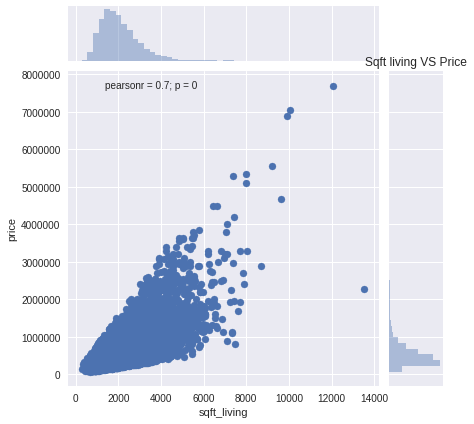

In [0]:
plt.figure(figsize= (60, 30))
sns.jointplot(train.sqft_living,train.price)
plt.xlabel = ('Sqft living')
plt.ylabel = ('Price')
plt.title('Sqft living VS Price')


#### grade 분석

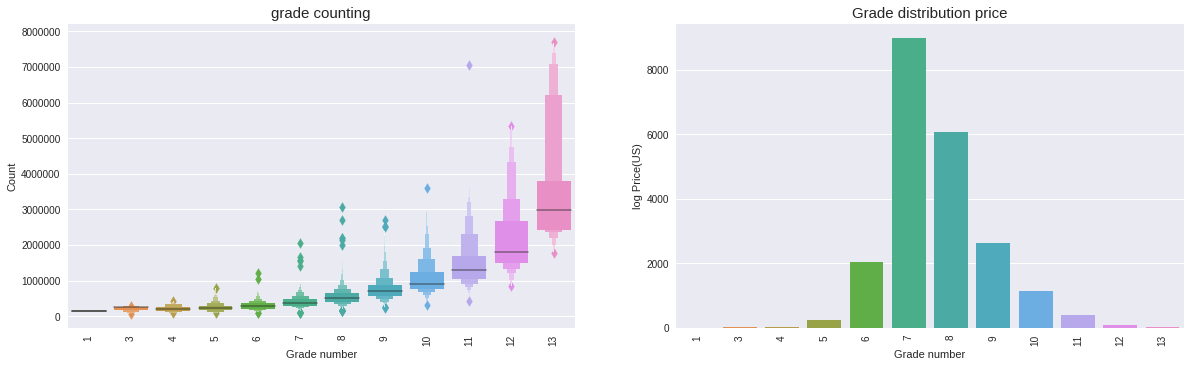

In [0]:
plt.figure(figsize = (20,15))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

ax1 = plt.subplot(221)
ax1 = sns.lvplot(x="grade", y='price', 
                    data=train, ax=ax1, )
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1.set_title("grade counting", fontsize=15)
ax1.set_xlabel("Grade number")
ax1.set_ylabel("Count")

ax2 = plt.subplot(222)
ax2 = sns.countplot(x="grade",
                  data=train, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
ax2.set_title("Grade distribution price", fontsize=15)
ax2.set_xlabel("Grade number")
ax2.set_ylabel("log Price(US)")



plt.show()

#### sqft_above 분석

#### sqft_living15 분석

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


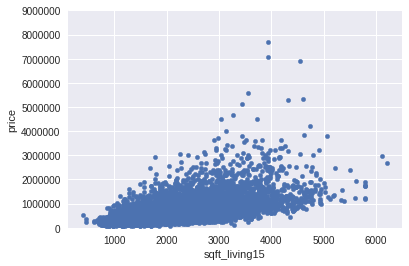

In [0]:
living15 = pd.concat([train['price'],train['sqft_living15']],axis=1)
living15.plot.scatter(x='sqft_living15',y='price', ylim=(3,9000000))

#### bathrooms 분석

Freuency bathroom description:
2    13851
1     3933
3     2527
4     1201
5       57
6       24
0       14
8        4
7        2
Name: bathrooms, dtype: int64


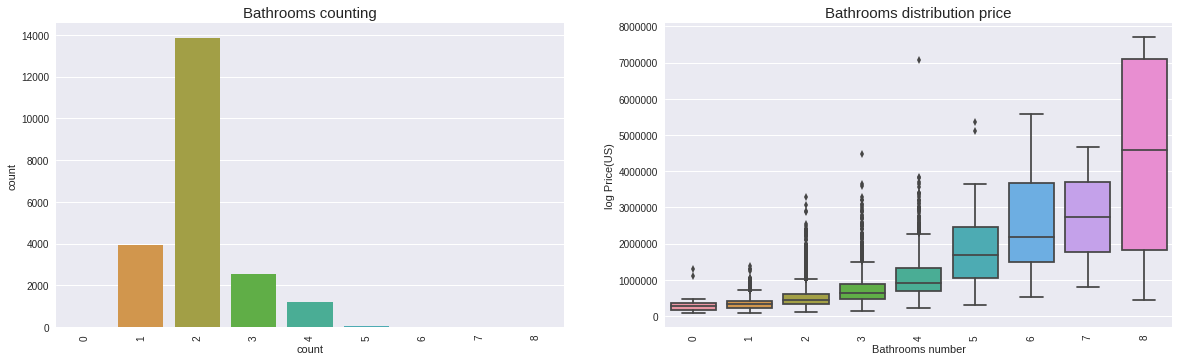

In [0]:
train["bathrooms"] = train['bathrooms'].round(0).astype(int)

print("Freuency bathroom description:")
print(train["bathrooms"].value_counts())

plt.figure(figsize = (20,15))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

ax1 = plt.subplot(221)
ax1 = sns.countplot(x="bathrooms", data=train,
                    ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1.set_title("Bathrooms counting", fontsize=15)
ax1.set_xlabel("Bathrooms number")
ax1.set_xlabel("count")

ax2 = plt.subplot(222)
ax2 = sns.boxplot(x="bathrooms", y='price',
                  data=train, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
ax2.set_title("Bathrooms distribution price", fontsize=15)
ax2.set_xlabel("Bathrooms number")
ax2.set_ylabel("log Price(US)")


plt.show()

#### Floors 분석

Floors counting description
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64


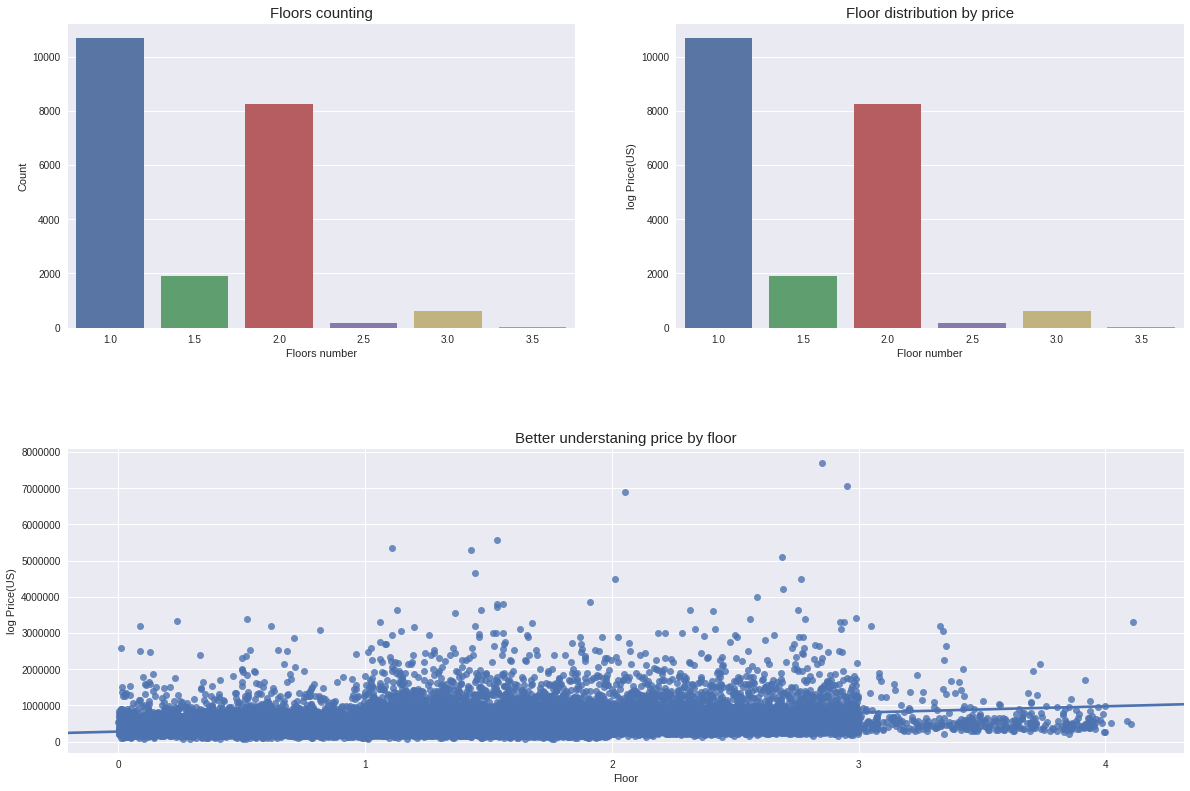

In [0]:
print("Floors counting description")
print(train['floors'].value_counts())


plt.figure(figsize = (20,15))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

ax1 = plt.subplot(221)
ax1 = sns.countplot(x="floors",
                    data=train, ax=ax1, )
ax1.set_title("Floors counting", fontsize=15)
ax1.set_xlabel("Floors number")
ax1.set_ylabel("Count")

ax2 = plt.subplot(222)
ax2 = sns.countplot(x="floors",
                  data=train, ax=ax2)
ax2.set_title("Floor distribution by price", fontsize=15)
ax2.set_xlabel("Floor number")
ax2.set_ylabel("log Price(US)")

ax0 = plt.subplot(212)
ax0 = sns.regplot(x="floors", y="price", #I need to change floors by sqft_living and hue bye floors
                    data=train, x_jitter=True)
ax0.set_title("Better understaning price by floor", fontsize=15)
ax0.set_xlabel("Floor")
ax0.set_ylabel("log Price(US)")

plt.show()

#### bedrooms 분석

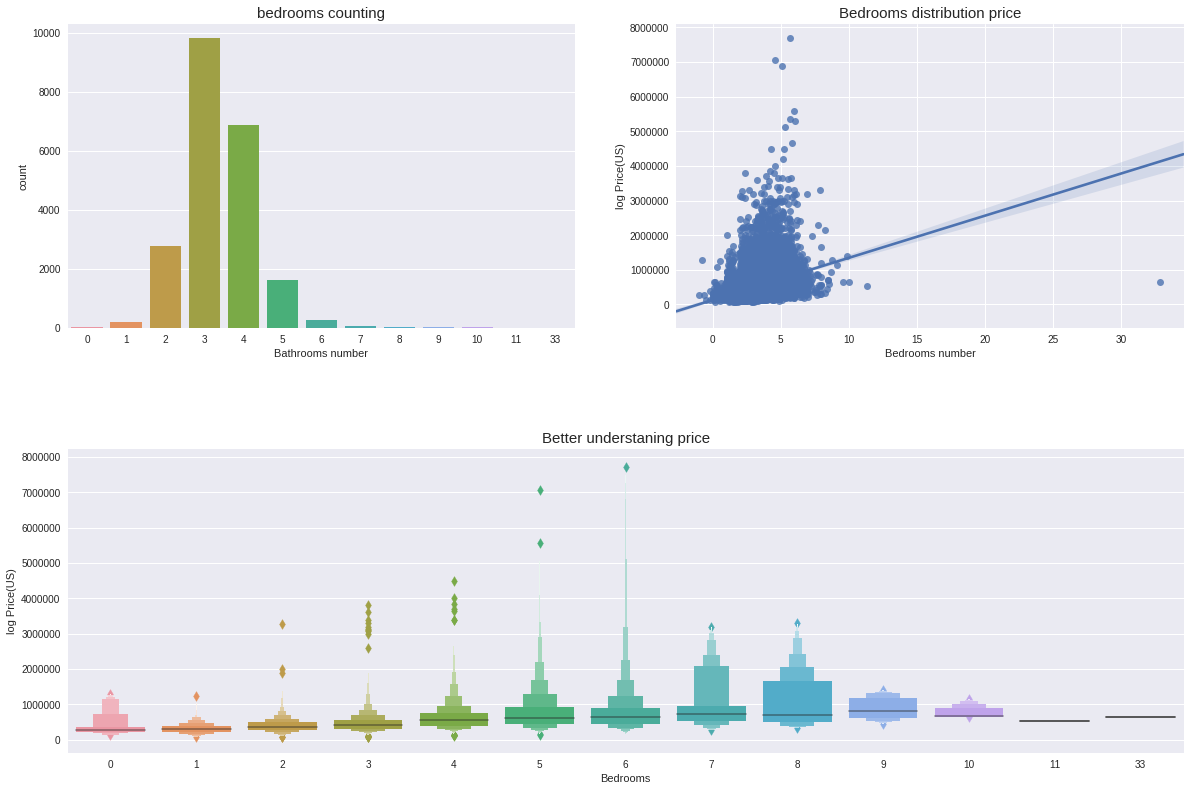

In [0]:
bedrooms = train.bedrooms.value_counts()


plt.figure(figsize = (20,15))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

ax1 = plt.subplot(221)
ax1 = sns.countplot(x="bedrooms", data=train,
                    ax=ax1)
ax1.set_title("bedrooms counting", fontsize=15)
ax1.set_xlabel("Bathrooms number")
ax1.set_ylabel("count")

ax2 = plt.subplot(222)
ax2 = sns.regplot(x="bedrooms", y='price', 
                  data=train, ax=ax2, x_jitter=True)
ax2.set_title("Bedrooms distribution price", fontsize=15)
ax2.set_xlabel("Bedrooms number")
ax2.set_ylabel("log Price(US)")

ax0 = plt.subplot(212)
ax0 = sns.lvplot(x="bedrooms", y="price",
                    data=train)
ax0.set_title("Better understaning price", fontsize=15)
ax0.set_xlabel("Bedrooms")
ax0.set_ylabel("log Price(US)")

plt.show()

## 데이터 분할 및 훈련

#### 라이브러리 추가

In [0]:
from sklearn.model_selection import train_test_split
# 훈련셋과 테스트셋으로 나눠주는 모듈

from time import time
# 모델의 학습 소요 시간을 체크하기 위한 모듈


from sklearn.metrics import explained_variance_score


### 데이터 분할

In [0]:

X = train[['sqft_living','grade','sqft_above','sqft_living15','bathrooms','view','sqft_basement','waterfront','yr_built','lat','bedrooms','long']].values
y = train.price.values
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, shuffle=True)

### 기계 학습 모델 적용

In [0]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=400,random_state=0)
start = time()
rf.fit(X_train, y_train)
end = time()
train_time_rf = end - start
rf_score = rf.score(X_test,y_test)
rf_predict = rf.predict(X_test)
exp_rf = explained_variance_score(rf_predict,y_test)

In [0]:
from sklearn.ensemble import GradientBoostingRegressor
start = time()
gb = GradientBoostingRegressor(n_estimators=400, max_depth=5, loss='ls',min_samples_split=2,learning_rate=0.1)
gb.fit(X_train, y_train)
end = time()
train_time_gb = end - start
gb_score = gb.score(X_test,y_test)
gb_predict= gb.predict(X_test)
exp_gb = explained_variance_score(gb_predict,y_test)

In [0]:
from sklearn.ensemble import AdaBoostRegressor
start = time()
ada = AdaBoostRegressor(n_estimators=50, learning_rate=0.2,loss='exponential')
ada.fit(X_train, y_train)
end = time()
train_time_ada = end - start
ada_score = ada.score(X_test,y_test)
predict = ada.predict(X_test)
exp_ada = explained_variance_score(predict,y_test)

In [0]:
from sklearn.tree  import DecisionTreeRegressor
decision = DecisionTreeRegressor()
start = time()
decision.fit(X_train, y_train)
end = time()
train_time_dec = end - start
dec_score = decision.score(X_test,y_test)
dec_predict = decision.predict(X_test)
exp_dec = explained_variance_score(dec_predict,y_test)

In [0]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(normalize=True)
start = time()
lr.fit(X_train,y_train)
end = time()
train_time_lr = end - start
lr_score =lr.score(X_test,y_test)
lr_predict = lr.predict(X_test)
exp_lr = explained_variance_score(lr_predict,y_test)


In [0]:
from sklearn.linear_model import Ridge

rg = Ridge(alpha = 7)
start = time()
rg.fit(X_train,y_train)
end = time()
train_time_rg = end - start
rg_score =rg.score(X_test,y_test)
rg_predict = rg.predict(X_test)
exp_rg = explained_variance_score(rg_predict,y_test)

In [0]:
from sklearn.linear_model import Lasso

ls = Lasso(alpha=.05)
start = time()
ls.fit(X_train,y_train)
end = time()
train_time_ls = end - start
ls_score =ls.score(X_test,y_test)
ls_predict = ls.predict(X_test)
exp_ls = explained_variance_score(ls_predict,y_test)

## 각 모델 평가 및 소요 시간 분석

In [0]:
models_score = pd.DataFrame({
    'Model': ['Gradient Boosting','AdaBoost','Random Forest','Decision Tree','Linear Regression','Lasso','Ridge'],
    'Score': [gb_score,ada_score,rf_score,dec_score,lr_score,ls_score,rg_score],
     'Variance Score': [exp_gb,exp_ada,exp_rf,exp_dec,exp_lr,exp_ls,exp_rg]})
    
models_score.sort_values(by='Score', ascending=False)

,Model,Score,Variance Score
0,Gradient Boosting,0.880013,0.872609
2,Random Forest,0.874283,0.859566
3,Decision Tree,0.752112,0.759608
4,Linear Regression,0.697079,0.585548
6,Ridge,0.697014,0.584935
5,Lasso,0.696852,0.587233
1,AdaBoost,0.667655,0.551331


In [0]:
models_time = pd.DataFrame({
    'Model': ['Gradient Boosting','AdaBoost','Random Forest','Decision Tree','Linear Regression','Lasso','Ridge'],
    'Time': [train_time_ada,
     train_time_gb,
    train_time_rf,
    train_time_dec,
    train_time_lr,
    train_time_rg,
    train_time_ls]})

models_time.sort_values(by='Time',ascending=False)

,Model,Time
2,Random Forest,41.990812
1,AdaBoost,7.707582
0,Gradient Boosting,1.593532
6,Ridge,1.052059
3,Decision Tree,0.175763
4,Linear Regression,0.012830
5,Lasso,0.010407


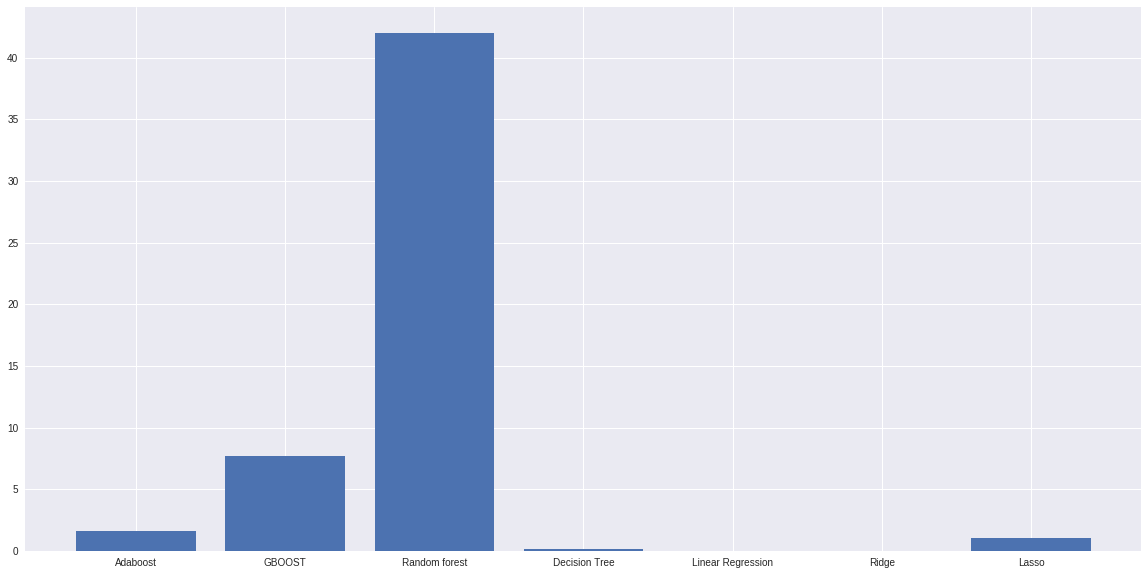

In [0]:
model = ['Adaboost', 'GBOOST', 'Random forest', 'Decision Tree','Linear Regression','Ridge','Lasso']
train_times = [
    train_time_ada,
    train_time_gb,
    train_time_rf,
    train_time_dec,
    train_time_lr,
    train_time_rg,
    train_time_ls
]
plt.figure(figsize=(20,10))
plt.bar(model,train_times)

plt.show()